<a href="https://colab.research.google.com/github/lvlanson/data_mining/blob/main/Praktikum_2_Aufgabe_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Funktion um Dataframes komplett anzuzeigen

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [32]:
# a) Laden der defekten Daten im CSV Format

import pandas as pd

url = "https://raw.githubusercontent.com/lvlanson/data_mining/main/Praktikum_2/Bodyfat_faulty.csv"

#data_frame = pd.read_csv(url, sep=";")

ParserError: ignored

In [3]:
# a) Laden der korrigierten Daten im CSV Format

import pandas as pd

url    = "https://raw.githubusercontent.com/lvlanson/data_mining/main/Praktikum_2/Bodyfat.csv"
data_frame = pd.read_csv(url, sep=";", error_bad_lines=False, warn_bad_lines=True)

In [4]:
# b) Daten analysieren
data_frame.head()

,Dichte,Koerperfettanteil,Alter,Gewicht_lbs,Groesse_inch,Nackenumfang,Brustumfang,Bauchumfang,Hueftumfang,Obschenkelumfang,Knieumfang,Fussgelenkumfang,Oberarmumfang,Unterarmumfang,Handgelenkumfang
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [33]:
# b) Daten analysieren
# Tabellarische Anzeige der Daten

from IPython.display import display

#display(data_frame)
print_full(data_frame)
#print(data_frame)

     Dichte  Koerperfettanteil  ...  Unterarmumfang  Handgelenkumfang
0    1.0708               12.3  ...            27.4              17.1
1    1.0853                6.1  ...            28.9              18.2
2    1.0414               25.3  ...            25.2              16.6
3    1.0751               10.4  ...            29.4              18.2
4    1.0340               28.7  ...            27.7              17.7
..      ...                ...  ...             ...               ...
247  1.0736               11.0  ...            25.7              18.5
248  1.0236               33.6  ...            28.6              20.1
249  1.0328               29.3  ...            27.2              18.0
250  1.0399               26.0  ...            29.4              19.8
251  1.0271               31.9  ...            30.0              20.9

[250 rows x 15 columns]


In [6]:
# b) Daten analysieren
# Alle Datenpunkte anzeigen lassen
data_frame.dtypes

Dichte               float64
Koerperfettanteil    float64
Alter                  int64
Gewicht_lbs          float64
Groesse_inch         float64
Nackenumfang         float64
Brustumfang          float64
Bauchumfang          float64
Hueftumfang          float64
Obschenkelumfang     float64
Knieumfang           float64
Fussgelenkumfang     float64
Oberarmumfang        float64
Unterarmumfang       float64
Handgelenkumfang     float64
dtype: object

In [7]:
# b) Daten analysieren
# Den Datenpunkt Gewicht näher beschreiben
data_frame.Gewicht_lbs.describe()

count    252.000000
mean     178.924405
std       29.389160
min      118.500000
25%      159.000000
50%      176.500000
75%      197.000000
max      363.150000
Name: Gewicht_lbs, dtype: float64

In [8]:
# b) Daten analysieren
data_frame.Gewicht_lbs.value_counts(normalize=True)

177.25    0.011905
172.75    0.011905
184.25    0.011905
170.75    0.011905
152.25    0.011905
            ...   
147.75    0.003968
174.50    0.003968
169.50    0.003968
126.50    0.003968
154.25    0.003968
Name: Gewicht_lbs, Length: 197, dtype: float64

In [9]:
# b) Daten analysieren
# Boxplot der Daten
import plotly.graph_objs as go


data = []
for col in data_frame.columns:
  trace = go.Box(y=data_frame[col],
                 name=col)
  data.append(trace)


fig = go.Figure(data=data)
fig.show()

# data_frame.boxplot(figsize=(40,15), fontsize=20, grid=True, rot=55)

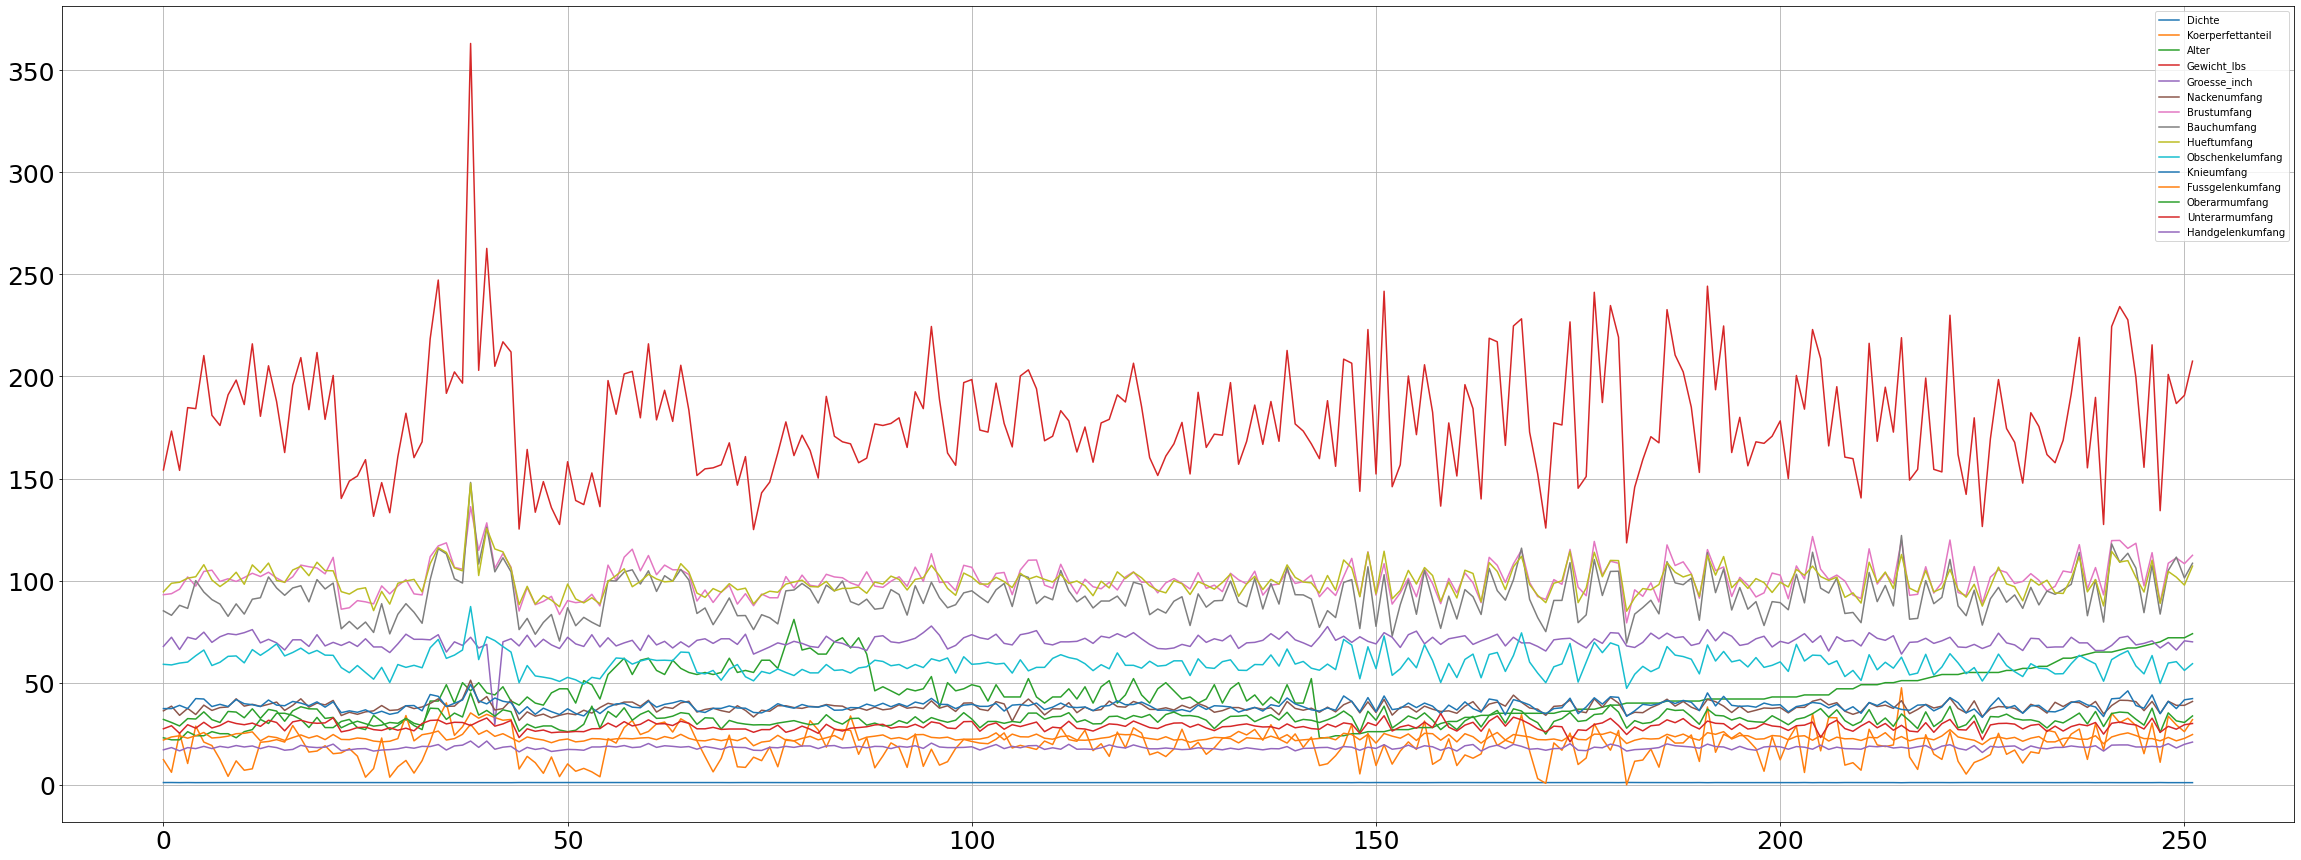

In [10]:
# b) Daten analysieren
data_frame.plot(figsize=(40,15), fontsize=25, grid=True)

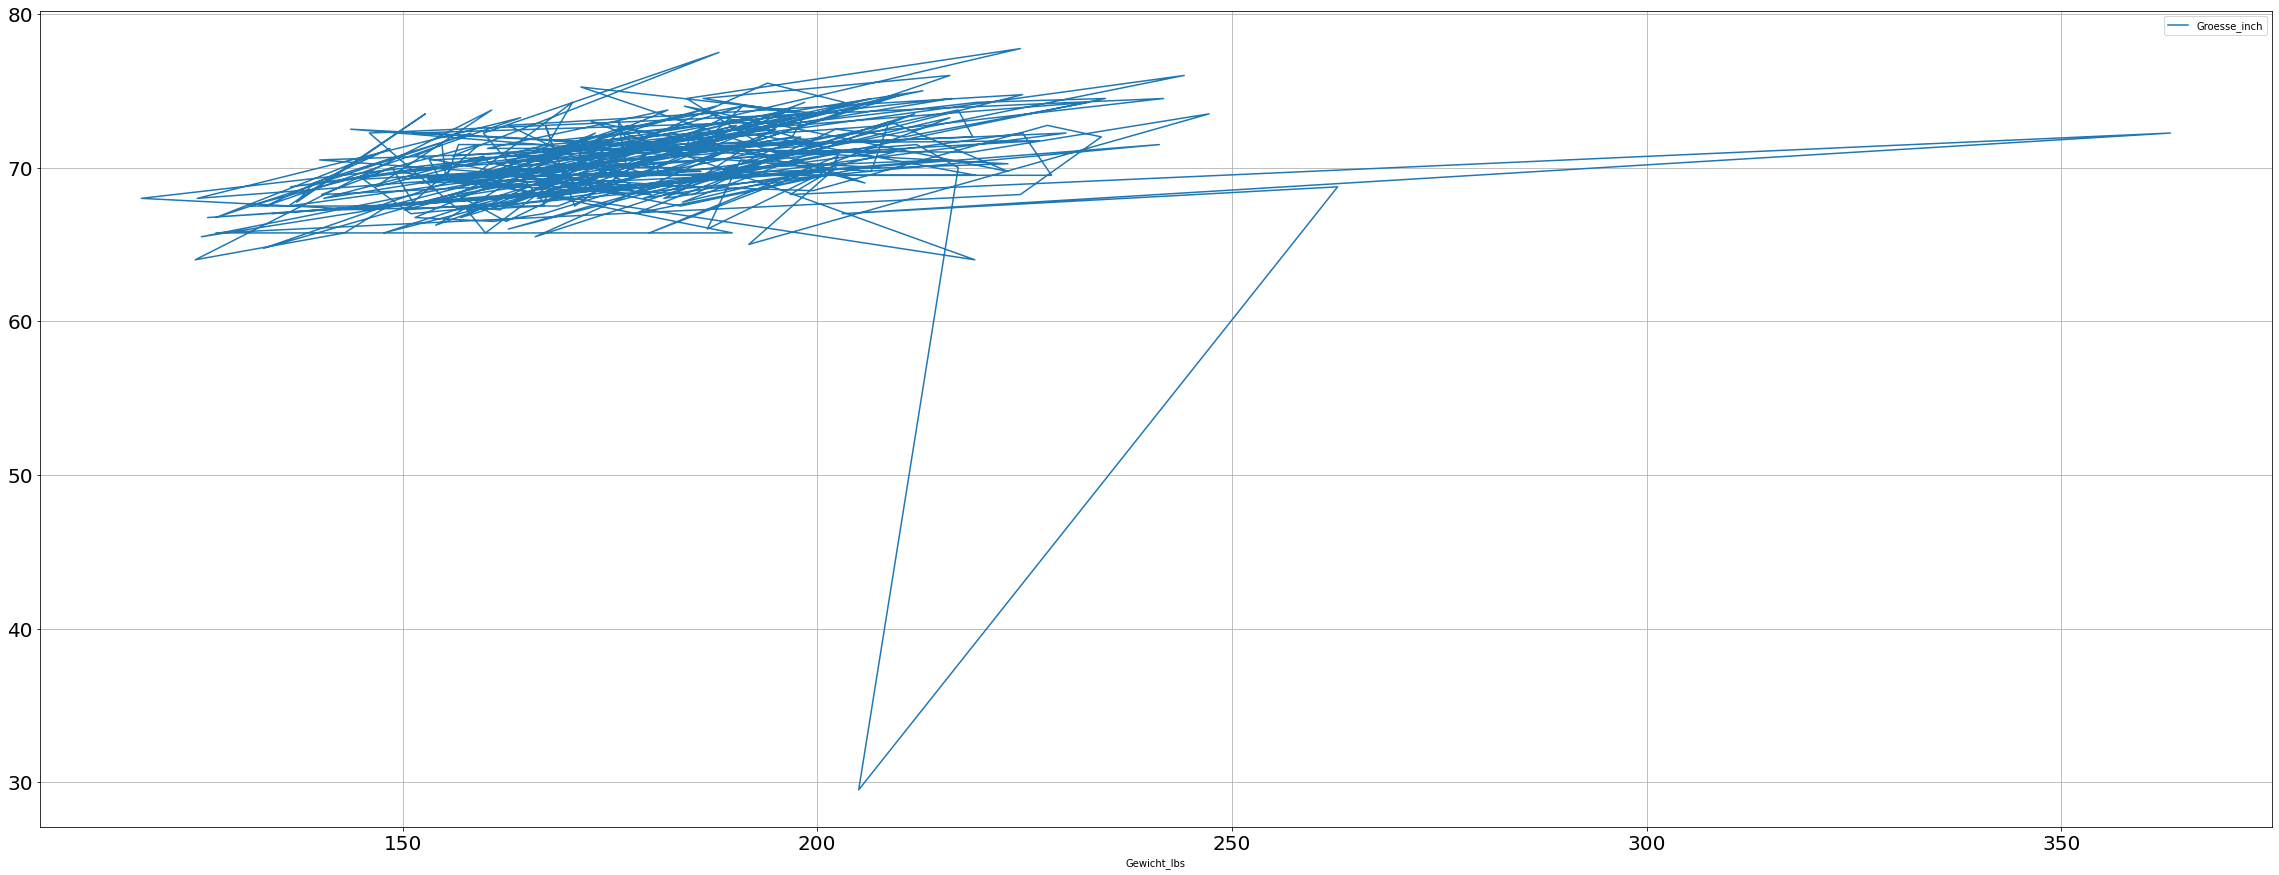

In [11]:
# b) Daten analysieren
data_frame.plot(figsize=(40,15), fontsize=20, grid=True, x="Gewicht_lbs", y="Groesse_inch")

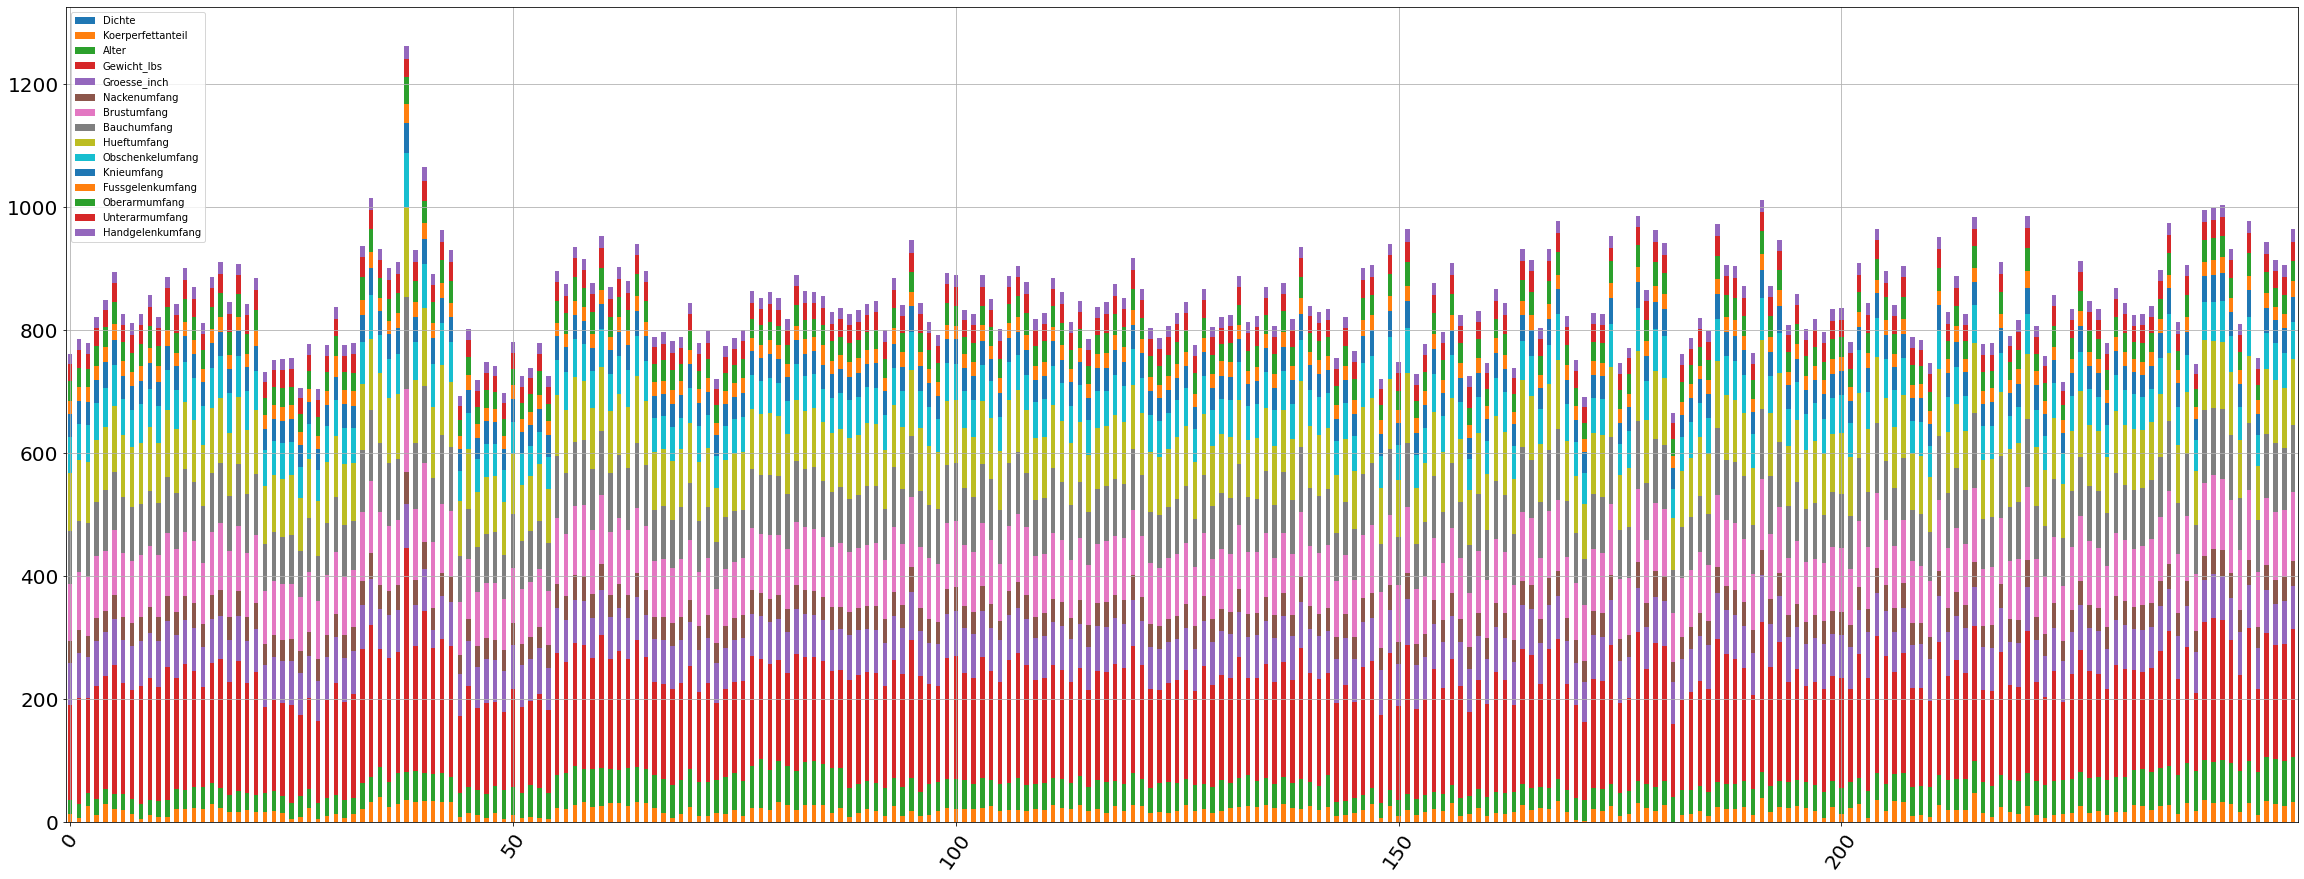

In [12]:
# b) Daten analysieren
data_frame.plot.bar(figsize=(40,15), fontsize=20, grid=True, rot=55, stacked=True, xticks=[x for x in range(0,250,50)])

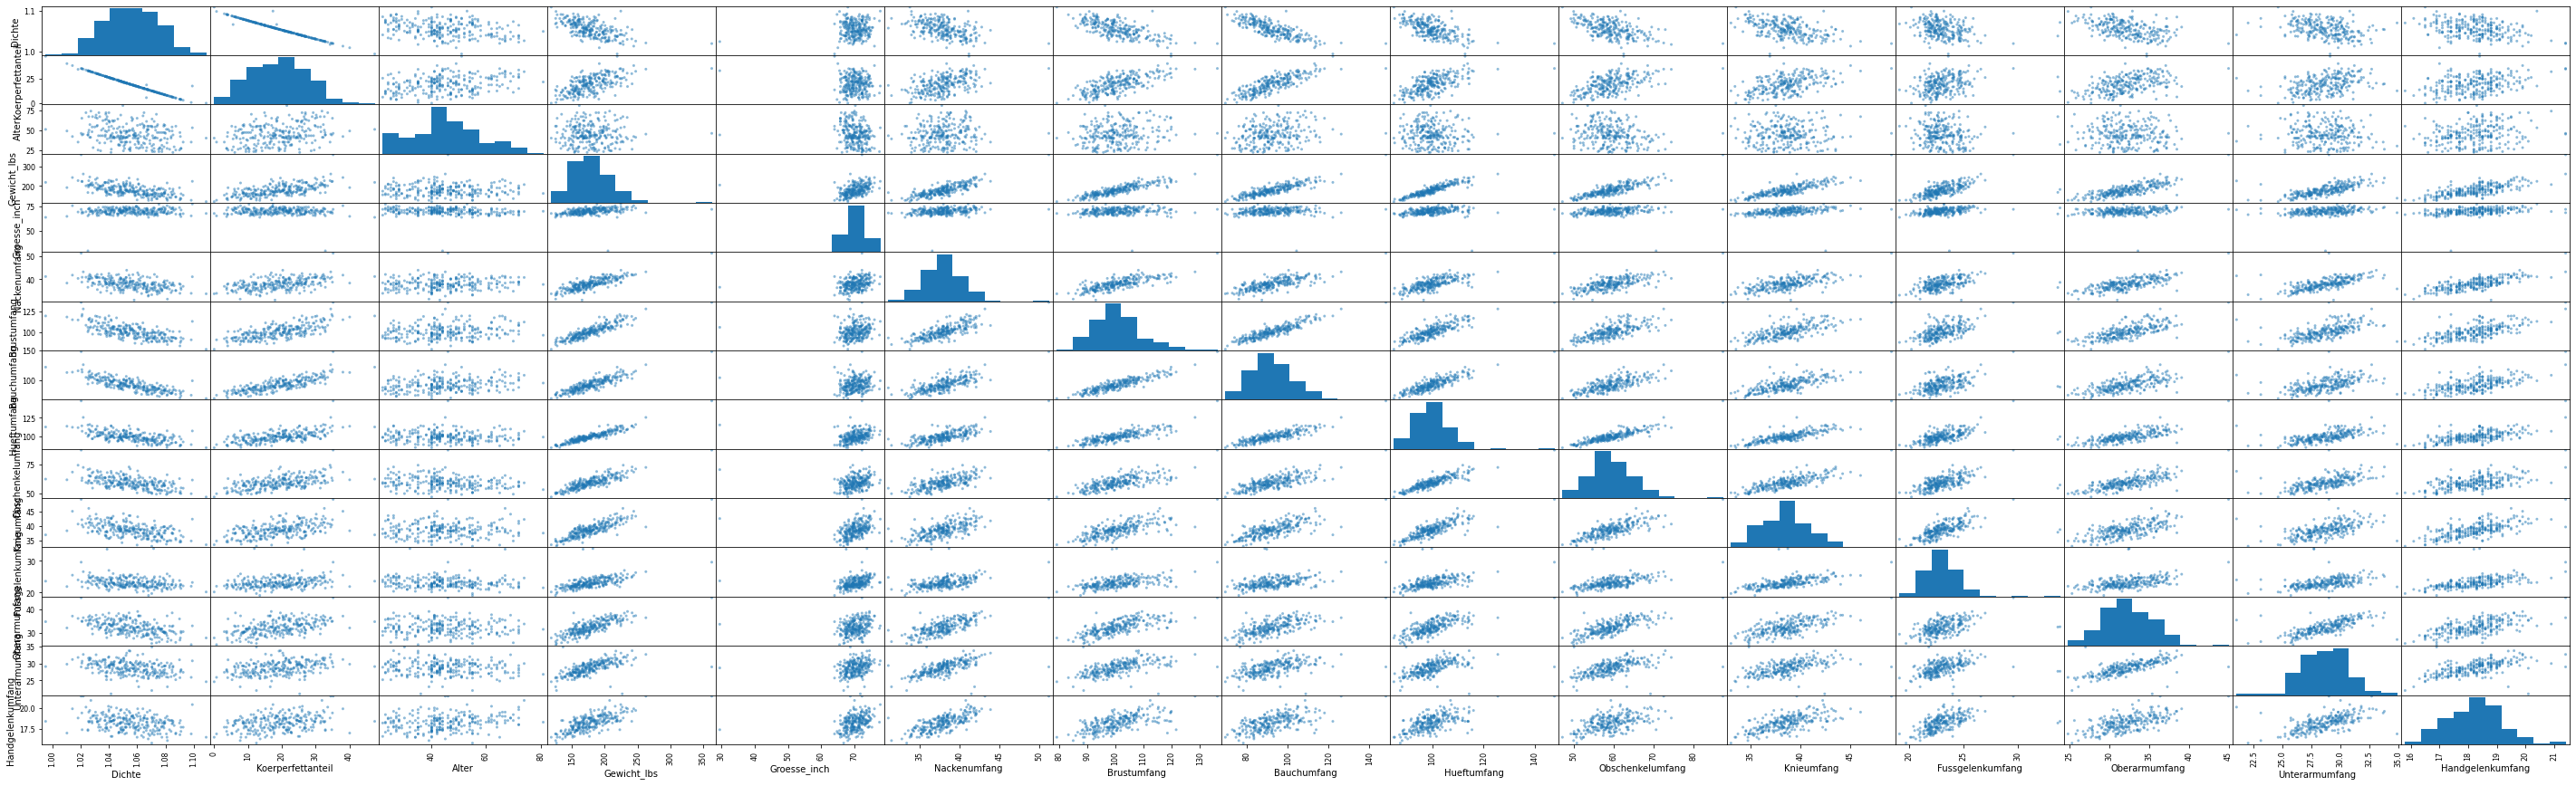

In [13]:
# b) Daten analysieren
_ = pd.plotting.scatter_matrix(data_frame, figsize=(50,15))

In [14]:
# b) Daten analysieren
import plotly.express as px
df = px.data.iris()
fig = px.scatter_matrix(data_frame)
fig.update_layout(width=2400,height=1500, autosize=False)
fig.show()

In [15]:
# c) Warum ist es nicht sinnvoll, die Dichte für eine Regressionsgerade (Modell) heranzuziehen?
# Gucken wir uns mal die Dichte an

print("Value Counts")
print(data_frame.Dichte.value_counts())
print("\nDescription")
print(data_frame.Dichte.describe())

Value Counts
1.0610    4
1.0524    3
1.0414    3
1.0484    3
1.0742    2
         ..
1.0873    1
1.0434    1
1.0926    1
1.0510    1
1.0256    1
Name: Dichte, Length: 218, dtype: int64

Description
count    252.000000
mean       1.055574
std        0.019031
min        0.995000
25%        1.041400
50%        1.054900
75%        1.070400
max        1.108900
Name: Dichte, dtype: float64


In [16]:
# d) Datenanalyse
# Korrelationen als Tabelle anzeigen

data_frame.corr()

,Dichte,Koerperfettanteil,Alter,Gewicht_lbs,Groesse_inch,Nackenumfang,Brustumfang,Bauchumfang,Hueftumfang,Obschenkelumfang,Knieumfang,Fussgelenkumfang,Oberarmumfang,Unterarmumfang,Handgelenkumfang
Dichte,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
Koerperfettanteil,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Alter,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Gewicht_lbs,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Groesse_inch,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Nackenumfang,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Brustumfang,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Bauchumfang,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hueftumfang,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Obschenkelumfang,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


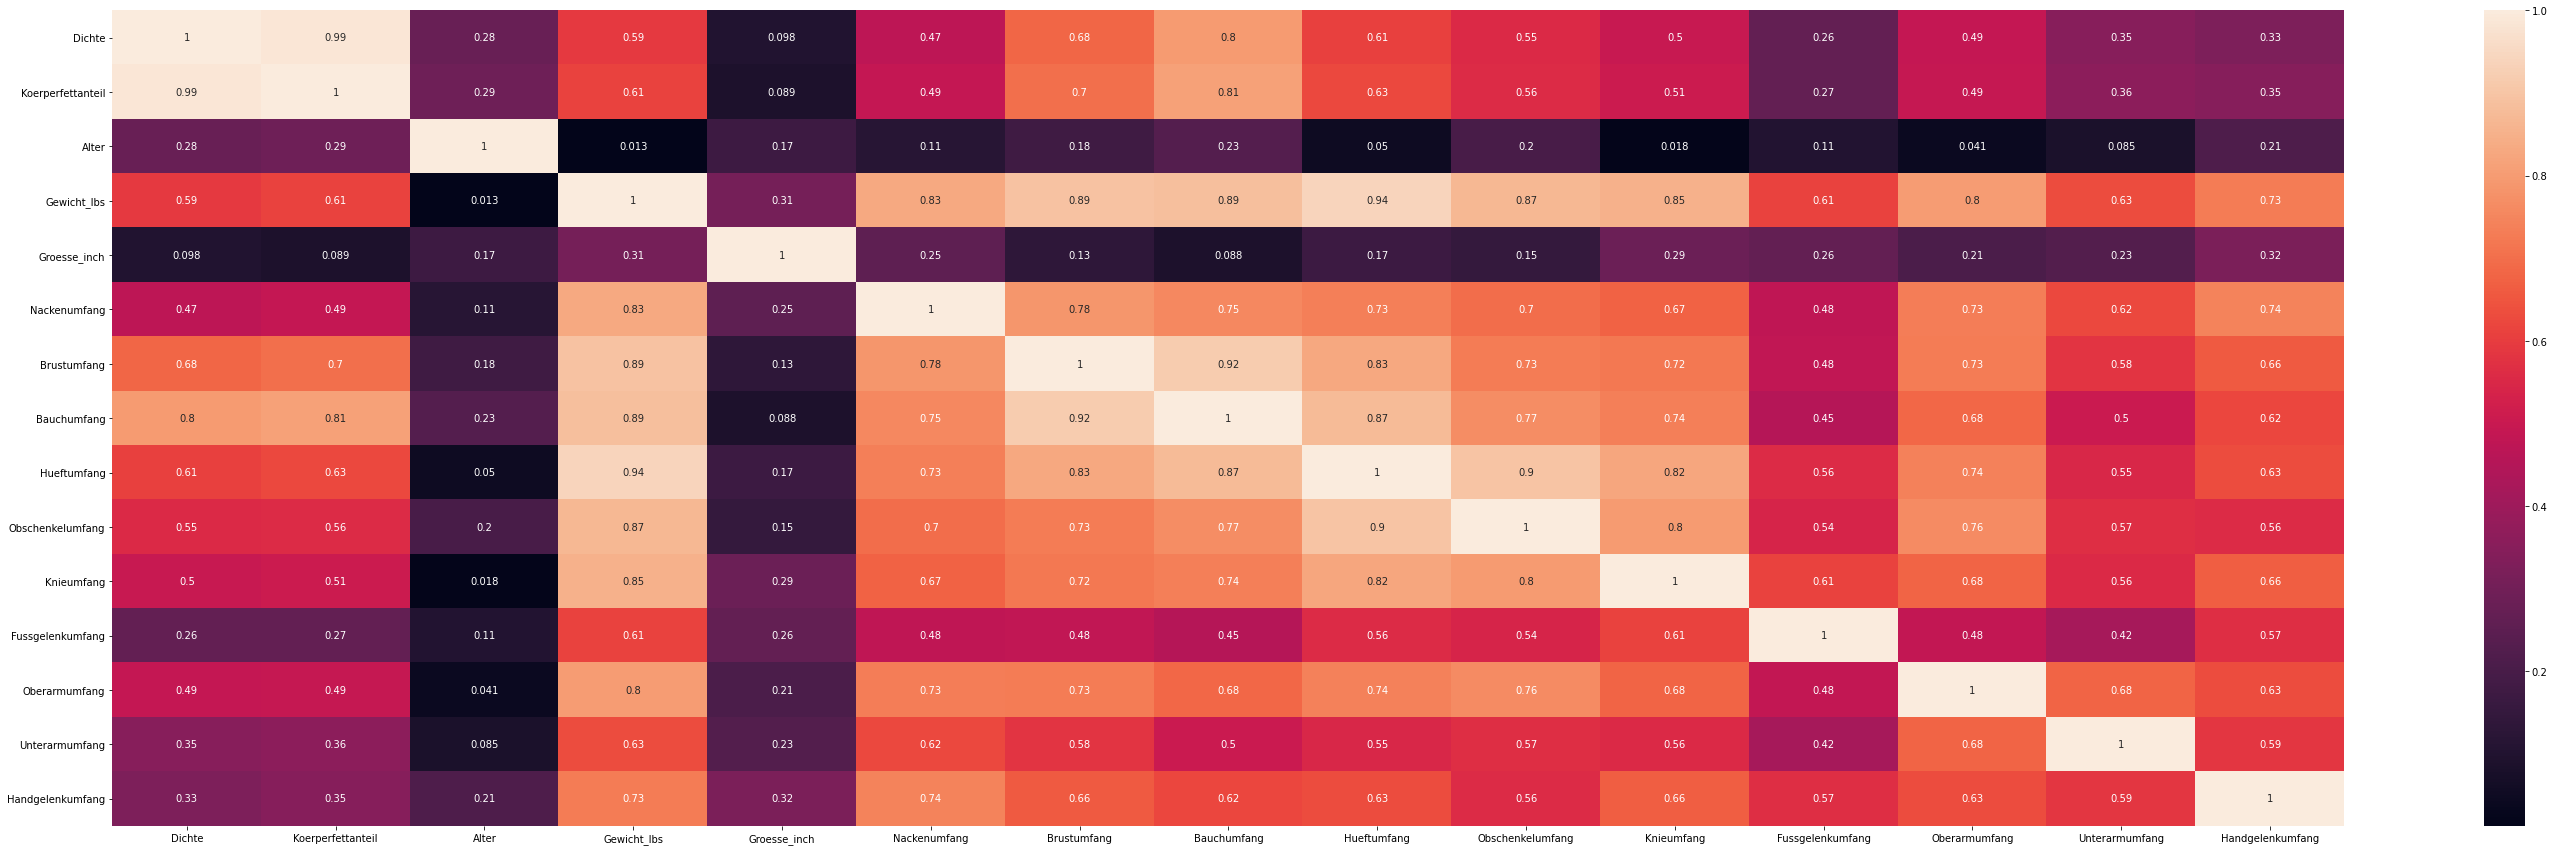

In [17]:
# d) Datenanalyse
# Korrelationen als Heatmap anzeigen
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(50,15))
sns.heatmap(data_frame.corr().abs(), annot=True)


In [18]:
# d) Datenanalyse
correlation_sorted = data_frame.corr().abs().stack().sort_values(ascending=False, kind="quicksort").drop_duplicates()
print_full(correlation_sorted)

Handgelenkumfang   Handgelenkumfang                    1.00
Koerperfettanteil  Dichte                              0.99
Gewicht_lbs        Hueftumfang                         0.94
Bauchumfang        Brustumfang                         0.92
Obschenkelumfang   Hueftumfang                         0.90
Gewicht_lbs        Brustumfang                         0.89
                   Bauchumfang                         0.89
Hueftumfang        Bauchumfang                         0.87
Gewicht_lbs        Obschenkelumfang                    0.87
                   Knieumfang                          0.85
                   Nackenumfang                        0.83
Hueftumfang        Brustumfang                         0.83
                   Knieumfang                          0.82
Bauchumfang        Koerperfettanteil                   0.81
Gewicht_lbs        Oberarmumfang                       0.80
Knieumfang         Obschenkelumfang                    0.80
Dichte             Bauchumfang          

In [19]:
# d) Datenanalyse
for i, val in correlation_sorted.items():
  if val < 0.75 or val == 1:
    correlation_sorted = correlation_sorted.drop(i)

print_full(correlation_sorted)

Koerperfettanteil  Dichte                              0.99
Gewicht_lbs        Hueftumfang                         0.94
Bauchumfang        Brustumfang                         0.92
Obschenkelumfang   Hueftumfang                         0.90
Gewicht_lbs        Brustumfang                         0.89
                   Bauchumfang                         0.89
Hueftumfang        Bauchumfang                         0.87
Gewicht_lbs        Obschenkelumfang                    0.87
                   Knieumfang                          0.85
                   Nackenumfang                        0.83
Hueftumfang        Brustumfang                         0.83
                   Knieumfang                          0.82
Bauchumfang        Koerperfettanteil                   0.81
Gewicht_lbs        Oberarmumfang                       0.80
Knieumfang         Obschenkelumfang                    0.80
Dichte             Bauchumfang                         0.80
Brustumfang        Nackenumfang         

In [37]:
# e) Zusammenhang Körpergewicht und Körpergröße

X_train = data_frame.Groesse_inch.to_numpy().reshape(-1,1)
y_train = data_frame.Gewicht_lbs.to_numpy()

#print(X_train)

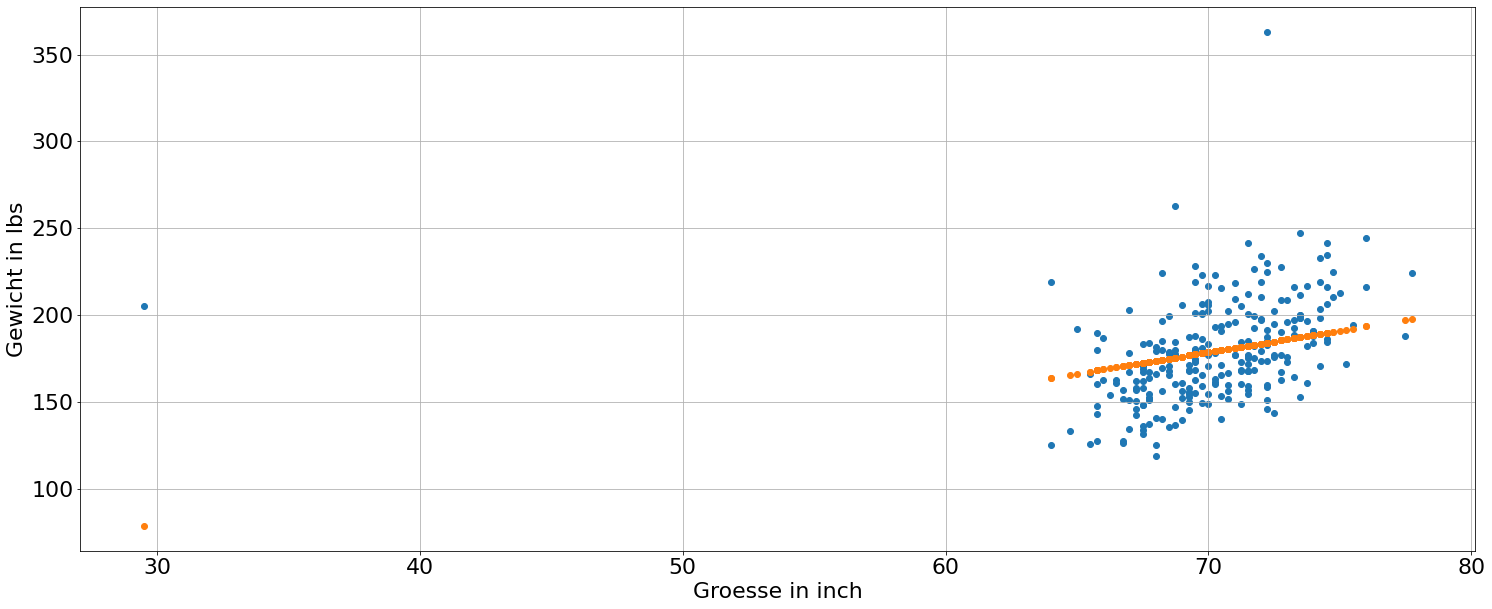

In [21]:
# e) Zusammenhang Körpergewicht und Körpergröße
# Regressionsmodell
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(25,10))

model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_train)

plt.scatter(X_train, y_train)
plt.scatter(X_train, y_predict)

plt.xlabel("Groesse in inch")
plt.ylabel("Gewicht in lbs")
plt.grid()

In [22]:
# e) Zusammenhang Körpergewicht und Körpergröße
# Groesse_inch genauer prüfen
data_frame.Groesse_inch.describe()

# Ausreißer bei 29.5

count    252.000000
mean      70.148810
std        3.662856
min       29.500000
25%       68.250000
50%       70.000000
75%       72.250000
max       77.750000
Name: Groesse_inch, dtype: float64

In [23]:
# e) Zusammenhang Körpergewicht und Körpergröße
# Gewicht prüfen
data_frame.Gewicht_lbs.describe()

# Ausreißer bei 118,5 und 363,15

count    252.000000
mean     178.924405
std       29.389160
min      118.500000
25%      159.000000
50%      176.500000
75%      197.000000
max      363.150000
Name: Gewicht_lbs, dtype: float64

In [38]:
# e) Zusammenhang Körpergewicht und Körpergröße
# Ausreißer entfernen
data_frame = data_frame.drop(index=data_frame.Groesse_inch.idxmin())
data_frame = data_frame.drop(index=data_frame.Gewicht_lbs.idxmax())
X_train = data_frame.Groesse_inch.to_numpy().reshape(-1,1)
y_train = data_frame.Gewicht_lbs.to_numpy()
display(data_frame.Groesse_inch)

0      67.75
1      72.25
2      66.25
3      72.25
4      71.25
       ...  
247    67.00
248    69.75
249    66.00
250    70.50
251    70.00
Name: Groesse_inch, Length: 246, dtype: float64

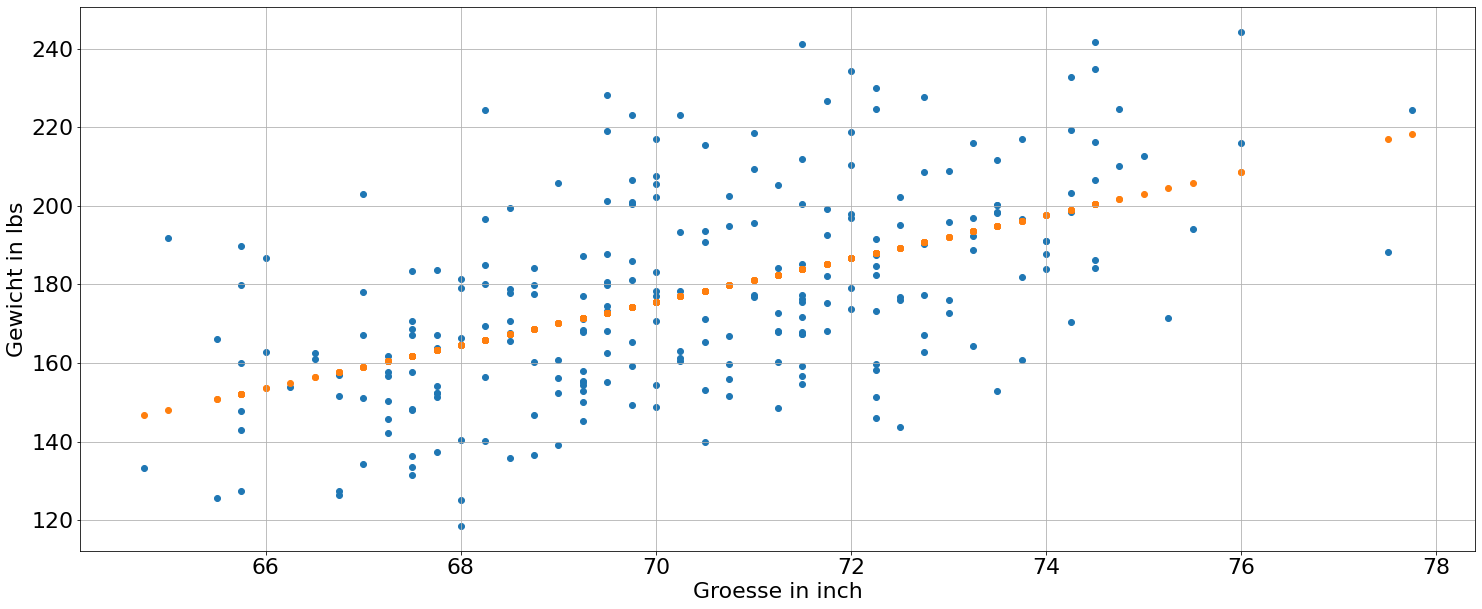

In [39]:
# e) Zusammenhang Körpergewicht und Körpergröße
# Ohne Ausreißer
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(25,10))

model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_train)

plt.scatter(X_train, y_train)
plt.scatter(X_train, y_predict)

plt.xlabel("Groesse in inch")
plt.ylabel("Gewicht in lbs")
plt.grid()

In [40]:
# e) Zusammenhang Körpergewicht und Körpergröße
# MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, y_predict)
print(f"MSE: {mse}")
print(f"RMSE: {sqrt(mse)}")

MSE: 474.0668493646482
RMSE: 21.773076249456533


In [41]:
# f) Zusammenhang Körpergewicht zu Größe und Hüftumfang
import numpy as np

X_train = data_frame[["Groesse_inch", "Hueftumfang"]]
#print(X_train)
y_train = data_frame["Gewicht_lbs"]

print(X_train.shape)
print(y_train.shape)

#X_train = np.asarray([x for x in X_train if np.logical_not(np.isnan(x))])
#y_train = np.asarray([y for y in y_train if np.logical_not(np.isnan(y))])

(246, 2)
(246,)


In [42]:
# f) Zusammenhang Körpergewicht zu Größe und Hüftumfang
# Regressionsmodell ohne Ausreißer

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_train)

In [43]:
# f) Zusammenhang Körpergewicht zu Größe und Hüftumfang
# Regressionsmodell ohne Ausreißer
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x=X_train['Groesse_inch'],
                                   y=X_train['Hueftumfang'],
                                   z=y_train,
                                   mode='markers')])
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
    width=800,
    height=800,
)

fig.show()

In [44]:
# f) Zusammenhang Körpergewicht zu Größe und Hüftumfang
fig = go.Figure(data=[go.Scatter3d(x=X_train['Groesse_inch'],
                                   y=X_train['Hueftumfang'],
                                   z=y_predict,
                                   mode='markers')])
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
    width=700,
    height=700,
)

fig.show()

In [45]:
# f) Zusammenhang Körpergewicht zu Größe und Hüftumfang
# MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, y_predict)
print(f"MSE: {mse}")
print(f"RMSE: {sqrt(mse)}")

MSE: 77.97755452499487
RMSE: 8.830490050104517
